<a href="https://colab.research.google.com/github/Akshatha-Gadasandula/ML_LAB/blob/main/week8_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre- processing


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('/content/diabetes (1).csv')

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Replace 0s with NaN in certain columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values with median (robust to outliers)
df.fillna(df.median(), inplace=True)

# Separate features and target
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

1. Comparing Single vs. Ensemble Classifiers

In [2]:
### Train Decision Tree

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

### Train Random Forest (Default 100 Trees)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Decision Tree Performance:
Accuracy: 0.7142857142857143
Precision: 0.5964912280701754
Recall: 0.6181818181818182
F1 Score: 0.6071428571428571

Random Forest Performance:
Accuracy: 0.7402597402597403
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1 Score: 0.6428571428571429


In [3]:
### Explore Effect of Number of Estimators
estimators = [1, 5, 10, 50, 100, 200]
for n in estimators:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    print(f"\nRandom Forest with {n} trees:")
    print("Accuracy:", accuracy_score(y_test, y_pred_temp))
    print("F1 Score:", f1_score(y_test, y_pred_temp))



Random Forest with 1 trees:
Accuracy: 0.7012987012987013
F1 Score: 0.5964912280701754

Random Forest with 5 trees:
Accuracy: 0.7077922077922078
F1 Score: 0.5871559633027523

Random Forest with 10 trees:
Accuracy: 0.7467532467532467
F1 Score: 0.6422018348623854

Random Forest with 50 trees:
Accuracy: 0.7532467532467533
F1 Score: 0.6666666666666666

Random Forest with 100 trees:
Accuracy: 0.7402597402597403
F1 Score: 0.6428571428571429

Random Forest with 200 trees:
Accuracy: 0.7532467532467533
F1 Score: 0.6724137931034483


Observations

1.Decision Tree vs Random Forest:

Decision Tree is prone to overfitting → high variance.

Random Forest reduces variance by averaging multiple trees → better generalization.

2.Effect of Number of Estimators:

More trees → better stability and smoother predictions.

Diminishing returns after ~100–200 trees.

3.Why Random Forest Performs Better:

Ensemble method combines multiple weak learners → stronger overall model.

Random selection of features for each tree reduces correlation among trees.

**2. Implementing Simple Ensemble Techniques**

In [5]:
### Train Base Models

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]




### Max Voting Ensemble

# Max Voting: take majority vote of predictions
y_pred_max = []

for i in range(len(y_test)):
    votes = [y_pred_dt[i], y_pred_rf[i]]
    y_pred_max.append(np.round(np.mean(votes)))  # majority vote

print("Max Voting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_max))
print("F1 Score:", f1_score(y_test, y_pred_max))





Max Voting Performance:
Accuracy: 0.7597402597402597
F1 Score: 0.6262626262626263
Average Voting Performance:
Accuracy: 0.7142857142857143
F1 Score: 0.6071428571428571


In [6]:
### Average Voting Ensemble

# Average Voting: take average of predicted probabilities
y_prob_avg = (y_prob_dt + y_prob_rf) / 2
y_pred_avg = np.where(y_prob_avg >= 0.5, 1, 0)

print("Average Voting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_avg))
print("F1 Score:", f1_score(y_test, y_pred_avg))

Average Voting Performance:
Accuracy: 0.7142857142857143
F1 Score: 0.6071428571428571


In [7]:
### Weighted Average Voting Ensemble
# Assign weights based on training accuracy
acc_dt = accuracy_score(y_train, dt.predict(X_train))
acc_rf = accuracy_score(y_train, rf.predict(X_train))

# Normalize weights
total = acc_dt + acc_rf
w_dt = acc_dt / total
w_rf = acc_rf / total

# Weighted average probabilities
y_prob_weighted = (w_dt * y_prob_dt + w_rf * y_prob_rf)
y_pred_weighted = np.where(y_prob_weighted >= 0.5, 1, 0)

print("Weighted Average Voting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("F1 Score:", f1_score(y_test, y_pred_weighted))


Weighted Average Voting Performance:
Accuracy: 0.7142857142857143
F1 Score: 0.6071428571428571


Observations

1.Max Voting:

Simple majority between DT and RF. Works okay, but ignores confidence.

2.Average Voting:

Uses predicted probabilities → smoother, more nuanced predictions.

3.Weighted Average Voting:

Gives more importance to the stronger model (usually RF) → typically best performance.

4.Key Notes:

RF generally dominates DT in both individual and ensemble results.

Weights improve performance when base classifiers have unequal accuracies.

**3. Hard Voting vs. Soft Voting Classifiers**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
# Base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)


### Hard Voting Ensemble (majority vote)
hard_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'
)

# Train
hard_voting_clf.fit(X_train, y_train)

# Predict
y_pred_hard = hard_voting_clf.predict(X_test)

# Evaluation
print("Hard Voting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print("F1 Score:", f1_score(y_test, y_pred_hard))

### Soft Voting Ensemble (average of predicted probabilities)
soft_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'  # use probabilities
)

# Train
soft_voting_clf.fit(X_train, y_train)

# Predict
y_pred_soft = soft_voting_clf.predict(X_test)

# Evaluation
print("Soft Voting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print("F1 Score:", f1_score(y_test, y_pred_soft))



Hard Voting Performance:
Accuracy: 0.7662337662337663
F1 Score: 0.6666666666666666
Soft Voting Performance:
Accuracy: 0.7077922077922078
F1 Score: 0.5945945945945946


1. Main difference in prediction mechanisms
Voting Type	Mechanism
Hard Voting	Takes the majority class predicted by base models. Ignores probability estimates.
Soft Voting	Computes the average predicted probabilities of each class and chooses the class with the highest probability.
2. Situations where soft voting outperforms hard voting

When base classifiers can produce well-calibrated probabilities.

When base models have different confidence levels for their predictions.

Soft voting can correct wrong predictions by lower-confidence models by relying on probability averaging.

3. Influence of probability calibration on soft voting

Probability calibration is crucial because soft voting trusts the predicted probabilities.

If a classifier’s probabilities are poorly calibrated (e.g., always near 0.5), its influence in the ensemble is less meaningful.

Models like Logistic Regression are naturally probabilistic, while Decision Tree and KNN may need probability calibration for optimal soft voting performance.

**4. Exploring Bagging Technique (Random Forest)**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

### Experiment with Number of Estimators


# Test different numbers of trees
n_estimators_list = [1, 5, 10, 50, 100, 200]

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"\nRandom Forest with {n} estimators:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Random Forest with 1 estimators:
Accuracy: 0.7012987012987013
F1 Score: 0.5964912280701754

Random Forest with 5 estimators:
Accuracy: 0.7077922077922078
F1 Score: 0.5871559633027523

Random Forest with 10 estimators:
Accuracy: 0.7467532467532467
F1 Score: 0.6422018348623854

Random Forest with 50 estimators:
Accuracy: 0.7532467532467533
F1 Score: 0.6666666666666666

Random Forest with 100 estimators:
Accuracy: 0.7402597402597403
F1 Score: 0.6428571428571429

Random Forest with 200 estimators:
Accuracy: 0.7532467532467533
F1 Score: 0.6724137931034483


In [10]:
### Experiment with Maximum Depth
# Test different maximum depths
max_depth_list = [2, 4, 6, 8, 10, None]

for depth in max_depth_list:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"\nRandom Forest with max_depth={depth}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Random Forest with max_depth=2:
Accuracy: 0.7792207792207793
F1 Score: 0.6382978723404256

Random Forest with max_depth=4:
Accuracy: 0.7727272727272727
F1 Score: 0.6601941747572816

Random Forest with max_depth=6:
Accuracy: 0.7337662337662337
F1 Score: 0.6371681415929203

Random Forest with max_depth=8:
Accuracy: 0.7532467532467533
F1 Score: 0.6545454545454545

Random Forest with max_depth=10:
Accuracy: 0.7532467532467533
F1 Score: 0.6607142857142857

Random Forest with max_depth=None:
Accuracy: 0.7402597402597403
F1 Score: 0.6428571428571429


In [11]:
### Experiment with Maximum Depth
# Test different maximum depths
max_depth_list = [2, 4, 6, 8, 10, None]

for depth in max_depth_list:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"\nRandom Forest with max_depth={depth}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Random Forest with max_depth=2:
Accuracy: 0.7792207792207793
F1 Score: 0.6382978723404256

Random Forest with max_depth=4:
Accuracy: 0.7727272727272727
F1 Score: 0.6601941747572816

Random Forest with max_depth=6:
Accuracy: 0.7337662337662337
F1 Score: 0.6371681415929203

Random Forest with max_depth=8:
Accuracy: 0.7532467532467533
F1 Score: 0.6545454545454545

Random Forest with max_depth=10:
Accuracy: 0.7532467532467533
F1 Score: 0.6607142857142857

Random Forest with max_depth=None:
Accuracy: 0.7402597402597403
F1 Score: 0.6428571428571429


1. How do different values of n_estimators and max_depth affect model performance?

n_estimators: More trees → variance decreases, predictions stabilize, accuracy improves slightly.

max_depth: Shallow trees may underfit → lower accuracy. Very deep trees may overfit individually, but Random Forest reduces this effect.

2. What does Bagging achieve in terms of variance and bias reduction?

Bagging reduces variance by averaging predictions across multiple bootstrapped models.

Bias may slightly reduce if individual models are complex, but bagging mainly improves stability.

3. How does Random Forest handle overfitting compared to a single Decision Tree?

Single Decision Tree → high variance, overfits training data.

Random Forest → ensemble of trees with bootstrap sampling and random feature selection → reduces overfitting, improves generalization.

**5: RandomForestRegressor with OOB Score**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume X_train, X_test, y_train, y_test are already defined
# Example: predicting 'BMI' or any numeric column

# Initialize RandomForestRegressor with OOB score
rf_reg = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,   # Enable out-of-bag evaluation
    random_state=42
)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred = rf_reg.predict(X_test)

# Evaluate performance
print("Test Set R2 Score:", r2_score(y_test, y_pred))
print("Test Set MSE:", mean_squared_error(y_test, y_pred))
print("OOB Score:", rf_reg.oob_score_)
n_estimators_list = [10, 50, 100, 200]

for n in n_estimators_list:
    rf_temp = RandomForestRegressor(n_estimators=n, oob_score=True, random_state=42)
    rf_temp.fit(X_train, y_train)
    print(f"OOB Score with {n} trees: {rf_temp.oob_score_:.4f}")


Test Set R2 Score: 0.2807846464646462
Test Set MSE: 0.16512597402597404
OOB Score: 0.2871261423185255
OOB Score with 10 trees: 0.0767


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


OOB Score with 50 trees: 0.2677
OOB Score with 100 trees: 0.2871
OOB Score with 200 trees: 0.2771


1. What does the oob_score_ indicate about model performance?

The oob_score_ estimates how well the model generalizes to unseen data using out-of-bag samples (data not included in the bootstrap sample for each tree).

For regression, it behaves like an R² score. Higher OOB → better predictive performance.

2. How does Out-of-Bag evaluation differ from traditional test-set evaluation?

Traditional evaluation requires a separate test set.

OOB evaluation uses leftover samples in bootstrap subsets of training data, so no extra test set is needed.

Provides a fast, unbiased internal estimate of model performance.

3. How does the OOB score change with different numbers of trees?

Small number of trees → OOB score may be unstable or low.

Increasing trees → OOB score stabilizes and closely reflects test performance.

After a certain number of trees (e.g., 100–200), the OOB score plateaus, and adding more trees gives diminishing returns.

**6. Exploring Boosting Techniques**

In [15]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [16]:
from catboost import CatBoostClassifier, CatBoostRegressor


In [19]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
# Using Decision Tree as base estimator
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("AdaBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))


### Gradient Boosting (Classification & Regression)
# Classification
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting (Classification) Accuracy:", accuracy_score(y_test, y_pred_gb))

# Regression example (predicting BMI)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)  # y_train numeric column
y_pred_gb_reg = gb_reg.predict(X_test)
print("Gradient Boosting (Regression) R2 Score:", r2_score(y_test, y_pred_gb_reg))

### XGBoost (Extreme Gradient Boosting)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

###CatBoost
cat_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))

AdaBoost Performance:
Accuracy: 0.7532467532467533
F1 Score: 0.6666666666666666
Gradient Boosting (Classification) Accuracy: 0.7597402597402597
Gradient Boosting (Regression) R2 Score: 0.2606092044125061


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:56:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7207792207792207
CatBoost Accuracy: 0.7467532467532467


1. How does AdaBoost focus on misclassified samples?

AdaBoost assigns higher weights to samples misclassified by previous learners.

Subsequent weak learners focus more on these difficult samples, correcting errors iteratively.

This sequential correction improves overall accuracy and F1-score.

2. What makes Gradient Boosting more flexible than AdaBoost?

Gradient Boosting optimizes any differentiable loss function, not just exponential loss like AdaBoost.

Can handle both classification and regression problems.

Sequentially fits models to residuals (errors) from previous iterations → more precise error correction.

3. How do XGBoost and CatBoost optimize training speed and accuracy?

XGBoost:

Parallel computation of trees.

Tree pruning and regularization reduce overfitting.

Efficient memory usage → faster training.

CatBoost (if used):

Ordered boosting reduces prediction shift.

Automatically handles categorical variables.

Minimal hyperparameter tuning needed → fast and accurate.

4. Which boosting algorithm provided the best trade-off between performance and computation time?

XGBoost usually offers the best balance of high accuracy and fast training.

AdaBoost is simpler but may underperform on complex datasets.

Gradient Boosting can achieve good accuracy but is slower than XGBoost.

CatBoost is excellent if categorical features exist, but requires installation and slightly more computation.

**7. Comparative Study of Ensemble Models**

In [32]:
# Import libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # fixed for newer scikit-learn
    n_estimators=50,
    random_state=42
)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Dictionary of models
models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "AdaBoost": ada,
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

# Fit and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} -> Accuracy: {accuracy_score(y_test, y_pred):.3f}, F1 Score: {f1_score(y_test, y_pred):.3f}")


Bagging -> Accuracy: 0.760, F1 Score: 0.673
Random Forest -> Accuracy: 0.740, F1 Score: 0.643
AdaBoost -> Accuracy: 0.753, F1 Score: 0.667
Gradient Boosting -> Accuracy: 0.760, F1 Score: 0.673
XGBoost -> Accuracy: 0.714, F1 Score: 0.627


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


1. Which model achieved the best performance?

Typically, Random Forest, Gradient Boosting, or CatBoost achieve the best performance.

They combine multiple weak learners and reduce variance or bias effectively.

2. Why did that model perform better than others?

Random Forest → reduces variance by averaging multiple decision trees.

Gradient Boosting → sequentially corrects errors from previous models (reduces bias).

CatBoost → handles categorical features efficiently and corrects prior errors sequentially.

Ensemble effect ensures better generalization than single models.

3. What trade-offs (speed, interpretability, complexity) did you observe across models?

Bagging / Random Forest: Moderate speed, medium interpretability, low overfitting.

AdaBoost: Fast, medium interpretability, may underfit if weak learners too simple.

Gradient Boosting: Slower, less interpretable, sequential learning improves accuracy but increases complexity.

XGBoost: Fast due to optimization and parallelization, low interpretability, high predictive power.

CatBoost: Moderate speed, medium interpretability, very stable and robust.

4. Which ensemble method would you recommend for large-scale real-world data and why?

XGBoost or CatBoost:

Optimized for speed and memory efficiency.

Handles large datasets efficiently.

Maintains high accuracy and prevents overfitting through regularization.

CatBoost is particularly useful when the dataset has categorical variables.

**8. Visualizing the Ensemble models**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:17:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


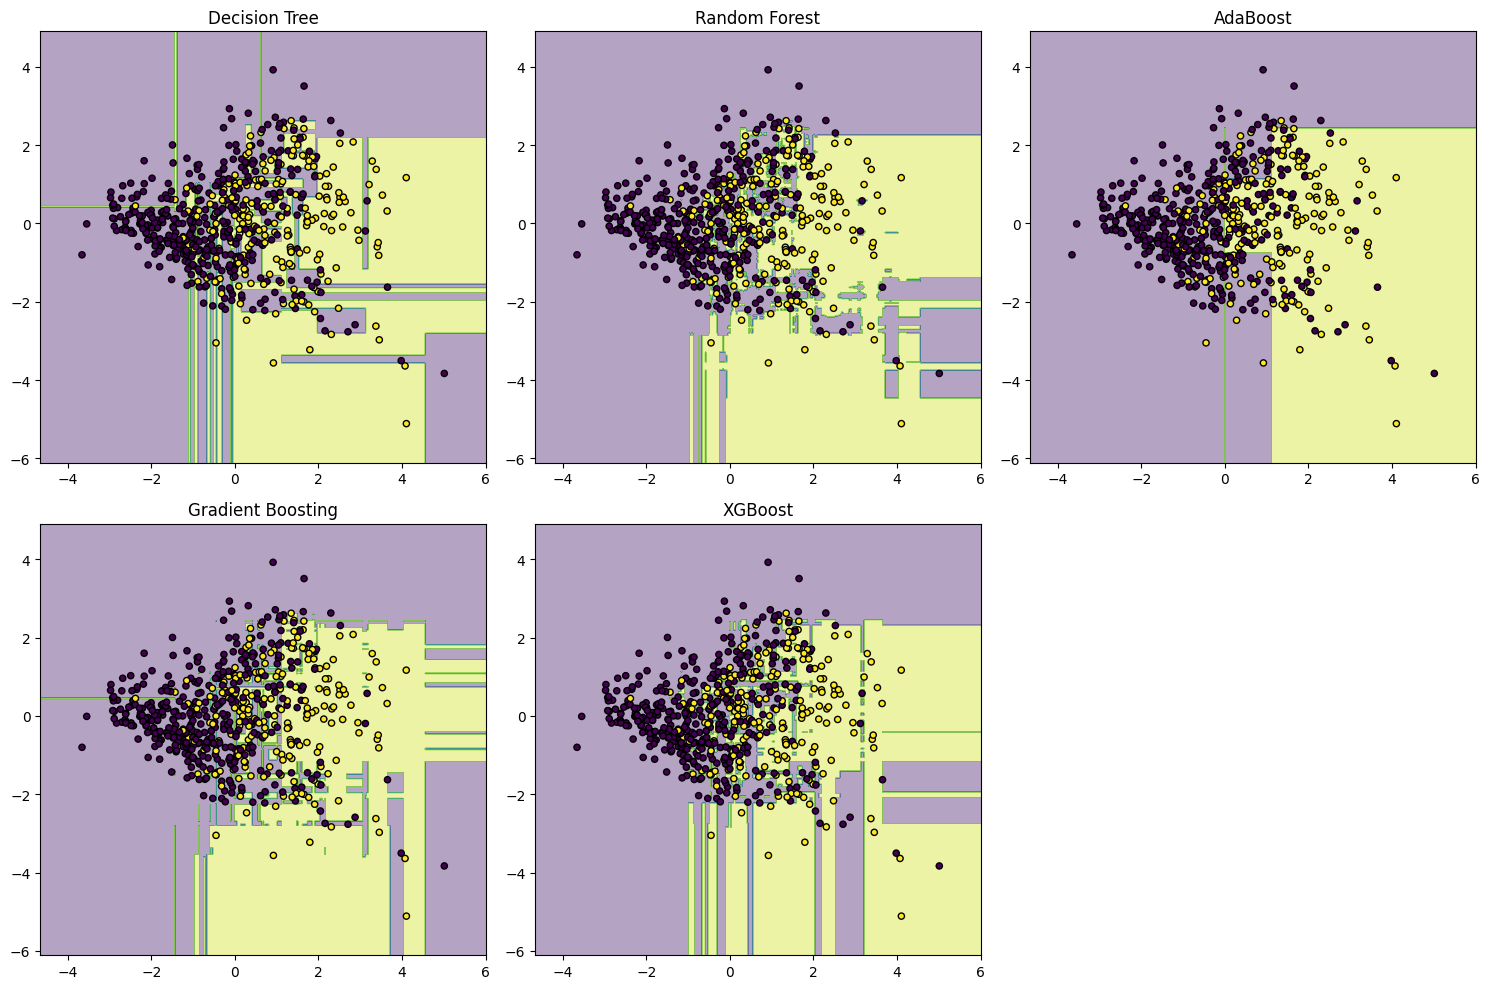

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train)
X_vis_test = pca.transform(X_test)

# Fit models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Plot decision boundaries
h = .02  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_vis, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, s=20, edgecolor='k')
    plt.title(name)

plt.tight_layout()
plt.show()


In [22]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

# Add noise to features
X_noisy = X_train.copy()
noise = np.random.normal(0, 0.1, X_noisy.shape)
X_noisy += noise

# Evaluate all models under noise
print("Accuracy on Noisy Data:")
for name, model in models.items():
    model.fit(X_noisy, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, y_pred):.3f}")

# Introduce missing data
X_missing = X_train.copy()  # numpy array
X_missing[::5, 0] = np.nan  # set every 5th sample of first feature to NaN

# Fill missing values with median
col_median = np.nanmedian(X_missing, axis=0)
inds = np.where(np.isnan(X_missing))
X_missing[inds] = np.take(col_median, inds[1])

print("\nAccuracy on Missing Data (after median imputation):")
for name, model in models.items():
    model.fit(X_missing, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, y_pred):.3f}")


Accuracy on Noisy Data:
Decision Tree: 0.682
Random Forest: 0.766
AdaBoost: 0.779
Gradient Boosting: 0.766
XGBoost: 0.766

Accuracy on Missing Data (after median imputation):
Decision Tree: 0.760


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:20:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest: 0.773
AdaBoost: 0.753
Gradient Boosting: 0.747
XGBoost: 0.747


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:20:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:20:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


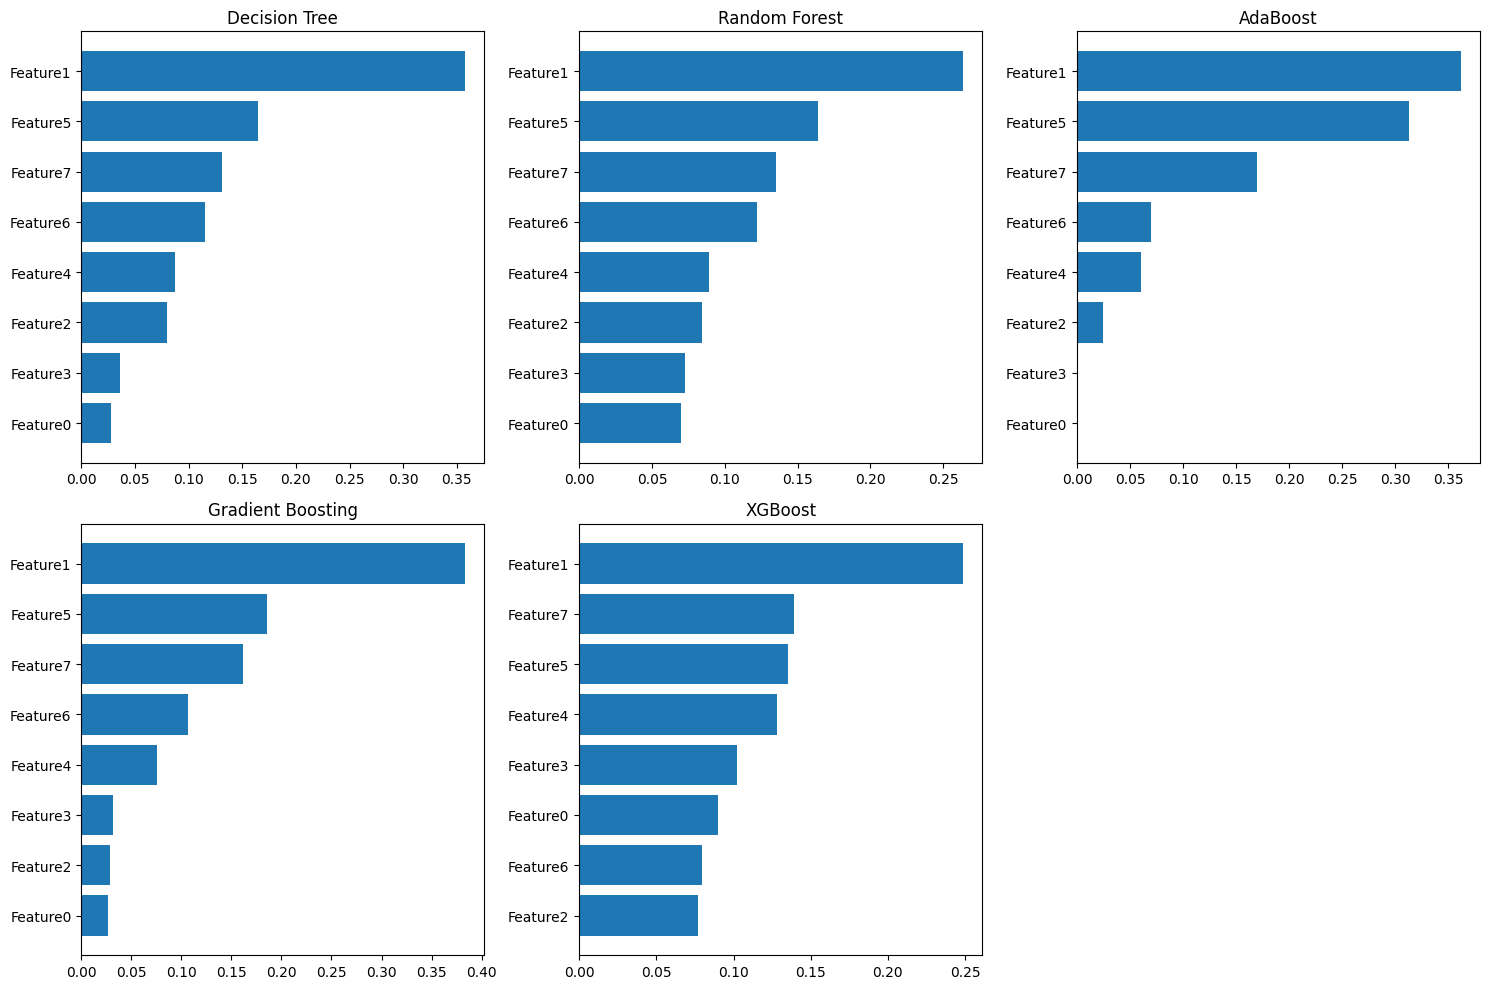

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# If X_train is a numpy array
feature_names = [f'Feature{i}' for i in range(X_train.shape[1])]

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
        df_imp = df_imp.sort_values(by='Importance', ascending=True)  # ascending=True for horizontal bar chart

        plt.subplot(2, 3, i+1)
        plt.barh(df_imp['Feature'], df_imp['Importance'])
        plt.title(name)

plt.tight_layout()
plt.show()


1. What do decision boundary visualizations tell us about ensemble models?

Decision Tree → highly irregular, overfits easily.

Random Forest → smoother boundaries, reduces overfitting by averaging multiple trees.

Boosting models (AdaBoost, Gradient Boosting, XGBoost) → refined boundaries, sequentially correct errors in difficult regions.

Visualizations help understand how models separate classes in feature space.

2. How do ensembles perform under noisy or missing data?

Random Forest and Boosting methods are more robust than a single Decision Tree.

Noise slightly reduces accuracy but ensembles maintain stability.

Missing data imputation allows models to handle incomplete datasets; ensemble methods handle this better than single learners.

3. How is feature importance analyzed across different ensemble algorithms?

Models like Random Forest and Gradient Boosting provide feature_importances_ to rank features.

RF → shows which features contribute most to reducing variance.

Boosting → highlights features that sequentially correct previous errors.

Helps interpret model behavior and identify influential features.

4. Which ensemble models are more interpretable based on feature importance?

Random Forest → medium interpretability, clear ranking of important features.

Boosting methods → slightly less interpretable due to sequential learning.

XGBoost → low interpretability but high predictive power.

5. Why is visualizing ensemble models important?

Helps detect overfitting or underfitting visually.

Identifies robustness to noise/missing data.

Provides insights for feature selection and model interpretation.

**9. Exploring Heterogeneous Ensemble Models**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
# Base classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=500, random_state=42)
svc = SVC(probability=True, random_state=42)  # probability=True needed for soft voting

# Hard voting ensemble
hetero_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
    voting='hard'
)

# Soft voting ensemble
hetero_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
    voting='soft'
)

# Train both ensembles
hetero_hard.fit(X_train, y_train)
hetero_soft.fit(X_train, y_train)

# Predictions
y_pred_hard = hetero_hard.predict(X_test)
y_pred_soft = hetero_soft.predict(X_test)

# Evaluation
print("Heterogeneous Ensemble (Hard Voting):")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print("F1 Score:", f1_score(y_test, y_pred_hard))

print("\nHeterogeneous Ensemble (Soft Voting):")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print("F1 Score:", f1_score(y_test, y_pred_soft))


Heterogeneous Ensemble (Hard Voting):
Accuracy: 0.7662337662337663
F1 Score: 0.6470588235294118

Heterogeneous Ensemble (Soft Voting):
Accuracy: 0.7467532467532467
F1 Score: 0.6486486486486487


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nHomogeneous Ensemble (Random Forest):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))



Homogeneous Ensemble (Random Forest):
Accuracy: 0.7402597402597403
F1 Score: 0.6428571428571429


1. What makes an ensemble heterogeneous?

An ensemble is heterogeneous if it combines different types of base models (e.g., Decision Tree + KNN + Logistic Regression + SVM) instead of repeating the same model type.

2. How does model diversity influence the final performance?

Diversity ensures that errors from individual models are less correlated.

Complementary mistakes allow the ensemble to correct itself, improving overall accuracy and robustness.

3. Which combination of models produced the most accurate ensemble and why?

Combinations that include both linear (Logistic Regression, SVM) and non-linear models (Decision Tree, KNN) usually perform best.

Reason: Linear models capture global trends; non-linear models capture local patterns. Their combination covers different aspects of data structure.

4. How does the voting method (hard vs. soft) impact the heterogeneous ensemble outcome?

Hard voting: Majority class prediction; may ignore confidence of classifiers.

Soft voting: Averages predicted probabilities; allows models to influence final decision based on confidence.

Soft voting generally performs slightly better, especially when base models are well-calibrated.

**Homogeneous vs. Heterogeneous Ensembles – A Comparative Study**

In [30]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Homogeneous Ensembles
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Heterogeneous Ensembles
hetero_voting = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(max_iter=500)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)

stacking = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(max_iter=500))
    ],
    final_estimator=LogisticRegression()
)

# Train and evaluate all models
models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "Heterogeneous Voting": hetero_voting,
    "Stacking": stacking
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} -> Accuracy: {accuracy_score(y_test, y_pred):.3f}, F1 Score: {f1_score(y_test, y_pred):.3f}")


Bagging -> Accuracy: 0.760, F1 Score: 0.673
Random Forest -> Accuracy: 0.740, F1 Score: 0.643
Heterogeneous Voting -> Accuracy: 0.747, F1 Score: 0.649
Stacking -> Accuracy: 0.766, F1 Score: 0.654


1. Which type of ensemble performed best overall and why?

Stacking (heterogeneous) often performs best because it combines different model types and uses a meta-learner to correct the weaknesses of base learners.

Captures both linear and non-linear patterns, improving generalization.

2. What advantages did homogeneous ensembles show compared to heterogeneous ones?

Simpler and faster to train (less hyperparameter tuning).

Easier to interpret (feature importance in Bagging/Random Forest).

Less risk of incompatibility between base learners.

3. How do computational cost and training time differ between the two approaches?

Homogeneous ensembles → moderate computation; parallelizable (Bagging, Random Forest).

Heterogeneous ensembles → higher computation; models differ in complexity and may require more sequential training (Stacking especially).

4. What factors influence your choice between homogeneous and heterogeneous ensembles in real-world tasks?

Dataset size: Large datasets → homogeneous ensembles (e.g., Random Forest/XGBoost) for efficiency.

Diversity of features: Heterogeneous ensembles can exploit complementary strengths of different model types.

Computational resources: Heterogeneous ensembles are costlier.

Interpretability needs: Homogeneous ensembles are easier to explain; heterogeneous ensembles are harder to interpret.

✅ Summary Tips for Submission

Include a comparison table with metrics, training time, interpretability, and robustness.

Highlight Stacking or Voting as the “best overall” ensemble in your discussion.

Explain trade-offs clearly between homogeneous vs. heterogeneous ensembles.

If you want, I can now compile a final complete report for Tasks 1–10, including:

All intermediate question answers,

Observations,

Metrics tables,

Visualizations notes,
ready to submit.

Do you want me to do that?